# Data analysis of Diabete dataset

Analysis tasks:

+ Perform an exploratory data analysis to get an initial understanding of the data, and present any interesting insights discovered.

+ Build and train a machine learning model to predict diabetes from the other variables available in the data set.
+ Select appropriate evaluation metrics, and measure the performance if the model.

+ Analyze and identify the top predictors of diabetes.

In [136]:
## import all the packages needed
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Data loading and examination

First, we load the data and observe the data.

In [137]:
## Read the CSV data from local drive
diabetes = pd.read_csv('gdrive/My Drive/2023SpringUW/CueZenInterview/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


In [138]:
## examine data head
pd.set_option('display.max_columns', None)
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Check data types

In this section, we check the basic information of the dataset. The dataset has 70,692 respondents and 21 variables. And then we change some data types from float to Int and categorical based on the [Meta data](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download&select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv).

In [139]:
## Examine data types of every column
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [140]:
## Change certain data types to 'category' based on the Meta data
for col in list(diabetes.columns):
    diabetes[col] = diabetes[col].astype('int')
    # Select columns that should be numeric
    if ('Diabetes_binary' in col or 'HighBP' in col or 'HighChol' in col or 'CholCheck' in 
        col or 'Smoker' in col or 'Stroke' in col or 'HeartDiseaseorAttack' in col or 'PhysActivity' in 
        col or 'Fruits' in col or 'Veggies' in col or 'HvyAlcoholConsump' in col or 'AnyHealthcare' in 
        col or 'NoDocbcCost' in col or 'DiffWalk' in col or 'Sex' in col):
        diabetes[col] = pd.Categorical(diabetes[col], ordered = False)
    if ('GenHlth' in col or 'Education' in col or 'Income' in col):
        diabetes[col] = pd.Categorical(diabetes[col], ordered = True)

In [141]:
## Check if the updated data types are accurate
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  int64   
 5   Smoker                70692 non-null  category
 6   Stroke                70692 non-null  category
 7   HeartDiseaseorAttack  70692 non-null  category
 8   PhysActivity          70692 non-null  category
 9   Fruits                70692 non-null  category
 10  Veggies               70692 non-null  category
 11  HvyAlcoholConsump     70692 non-null  category
 12  AnyHealthcare         70692 non-null  category
 13  NoDocbcCost           70692 non-null  category
 14  GenHlth               70692 non-null  category
 15  Me

### Check missing values

Next, we check whether this dataset contains missing values. It turns out that it's pretty clean and there are 0 columns that have missing values.

In [142]:
diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### Check duplicate rows

I assume duplicate rows are the same respondent. The duplicate rows are removed after being identified.

In [143]:
duplicates = diabetes[diabetes.duplicated()]
print("Duplicate Rows : ",len(duplicates))

diabetes = diabetes.drop_duplicates()

Duplicate Rows :  1635


## 2. Exploratory analysis

### Describe data stats

In the exploratory analysis part, we first describe the data statistics of both categorical and numerical data, to get a basic idea of what each data variable looks like. 

In [144]:
## describe categorical data
diabetes.astype('object').describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057,69057
unique,2,2,2,2,80,2,2,2,2,2,2,2,2,2,5,31,31,2,2,13,6,8
top,1,1,1,1,27,0,0,0,1,1,1,0,1,0,3,0,0,0,0,10,6,8
freq,35097,39447,36692,67317,6118,35776,64662,58638,48097,41825,54149,66052,65874,62418,23246,46485,38311,51198,37535,10585,24646,19307


In [145]:
## describe numerical data
diabetes.describe()

,BMI,MentHlth,PhysHlth,Age
count,69057.000000,69057.000000,69057.000000,69057.000000
mean,29.955834,3.840103,5.945306,8.604037
std,7.147972,8.231164,10.139113,2.858284
min,12.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,0.000000,7.000000
50%,29.000000,0.000000,0.000000,9.000000
75%,33.000000,3.000000,6.000000,11.000000
max,98.000000,30.000000,30.000000,13.000000




### Response variable: diabetes

The response variable ('Diabetes_binary') is a binary variable where 1 indicates prediabetes or diabetes while 0 indicates no diabetes. The dataset is balanced thus it has 50-50 split of respondents with no diabetes and with either prediabetes or diabetes, as is shown in the following bar graph.

After removing 1,635 duplicate rows, it's not 50-50 but still pretty balanced



<Axes: xlabel='Diabetes_binary', ylabel='count'>

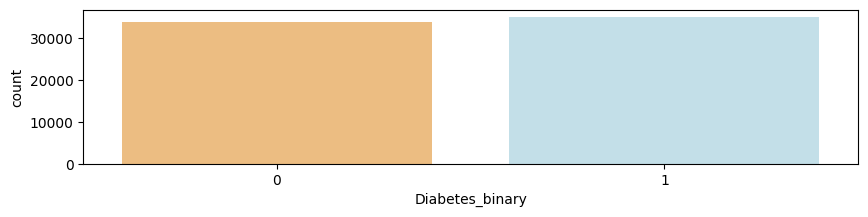

In [146]:
# bar plot: dependent variable
fig = plt.figure(figsize = (10, 2))
sns.countplot(data = diabetes, x = 'Diabetes_binary', palette = 'RdYlBu')

### Predictors

Next, we first visualize the relationship between numerical variables and the response variable using box plots. Then we remove the outliers and normalize the numeric variables.

Second, we visualize the relationship between categorical variables and the response variable using group car charts.

#### Numerical variables

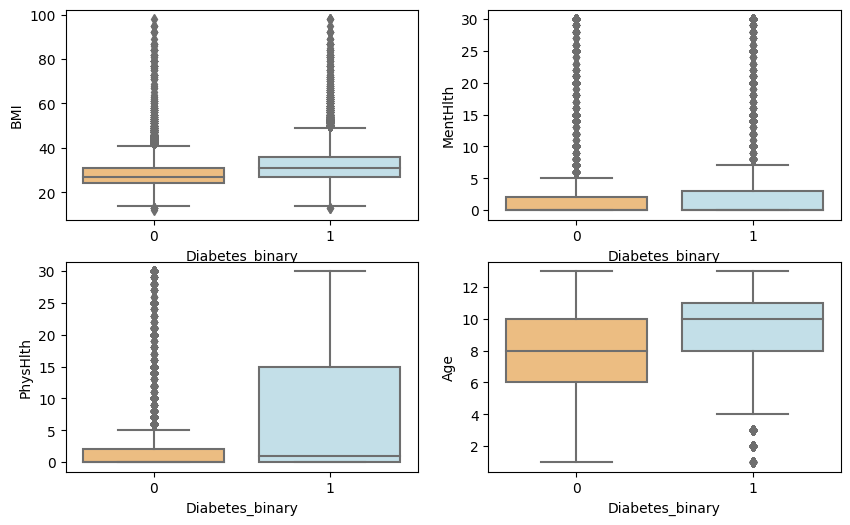

In [147]:
num_list = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

fig = plt.figure(figsize = (10, 6))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2, 2, i + 1)
  chart = sns.boxplot(data = diabetes, x = 'Diabetes_binary', y = column, palette = 'RdYlBu')

### Remove outliers

There are some outliers as shown in the box plot. I try to be conservative when throwing out outliers. I am using the definition of an [extreme outlier](https://people.richland.edu/james/lecture/m170/ch03-pos.html): 

+ On the low end, an extreme outlier is below **First quantile - 3*interquantile range**
+ On the high end, an extreme outlier is above **Third quantile + 3*interquantile range**

In [148]:
## remove outliers
for col in ['BMI', 'MentHlth', 'PhysHlth']:
    # Calculate first and third quartile
    first_quartile = diabetes[col].describe()['25%']
    third_quartile = diabetes[col].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    diabetes = diabetes[(diabetes[col] > (first_quartile - 3 * iqr)) &
                (diabetes[col] < (third_quartile + 3 * iqr))]


In [149]:
## transform the numeric variables: making them more normally distributed
diabetes['BMI'] = np.log(diabetes['BMI'])
diabetes['Age'] = np.square(diabetes['Age']) 

In [150]:
## Normalize numerical variables
diabetes['Age'] = (diabetes['Age'] - diabetes['Age'].min())/(diabetes['Age'].max()-diabetes['Age'].min())
diabetes['BMI'] = (diabetes['BMI'] - diabetes['BMI'].min())/(diabetes['BMI'].max()-diabetes['BMI'].min())
diabetes['MentHlth'] = (diabetes['MentHlth'] - diabetes['MentHlth'].min())/(diabetes['MentHlth'].max()-diabetes['MentHlth'].min())
diabetes['PhysHlth'] = (diabetes['PhysHlth'] - diabetes['PhysHlth'].min())/(diabetes['PhysHlth'].max()-diabetes['PhysHlth'].min())

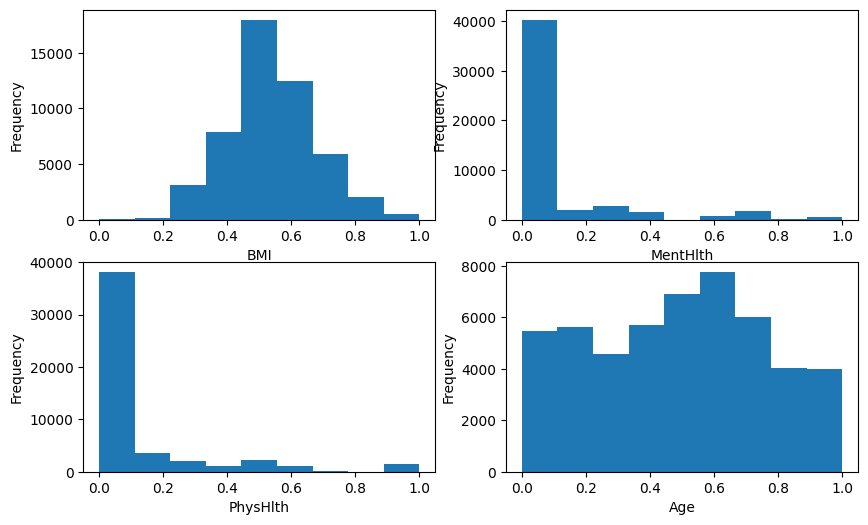

In [155]:
## plot histagram of numeric variables
fig = plt.figure(figsize = (10,6))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2, 2, i + 1)
  sub.set_xlabel(column)
  diabetes[column].plot(kind = 'hist', bins = 9)
  i = i + 1

Two observations can be drawn from the updated boxplot below: respondents who have diabetes seem to have higher BMI and are older.

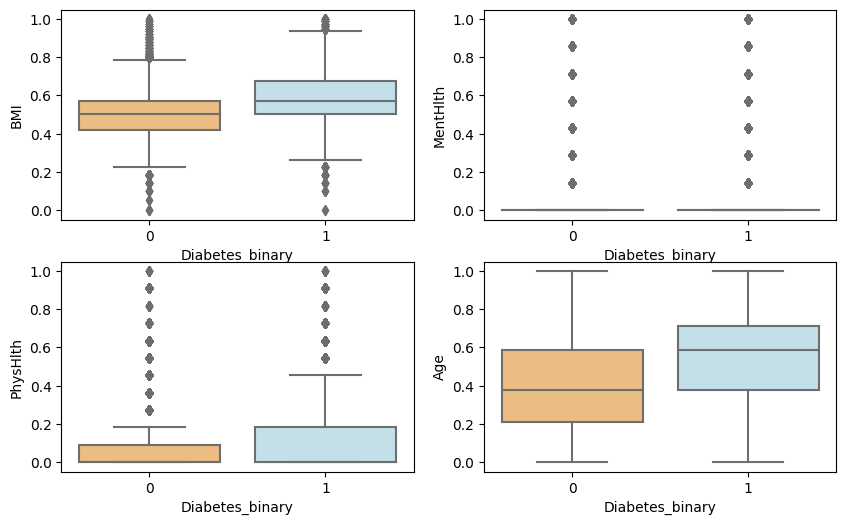

In [167]:
num_list = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

fig = plt.figure(figsize = (10, 6))

for i in range(len(num_list)):
  column = num_list[i]
  sub = fig.add_subplot(2, 2, i + 1)
  chart = sns.boxplot(data = diabetes, x = 'Diabetes_binary', y = column, palette = 'RdYlBu')

#### Categorical variables

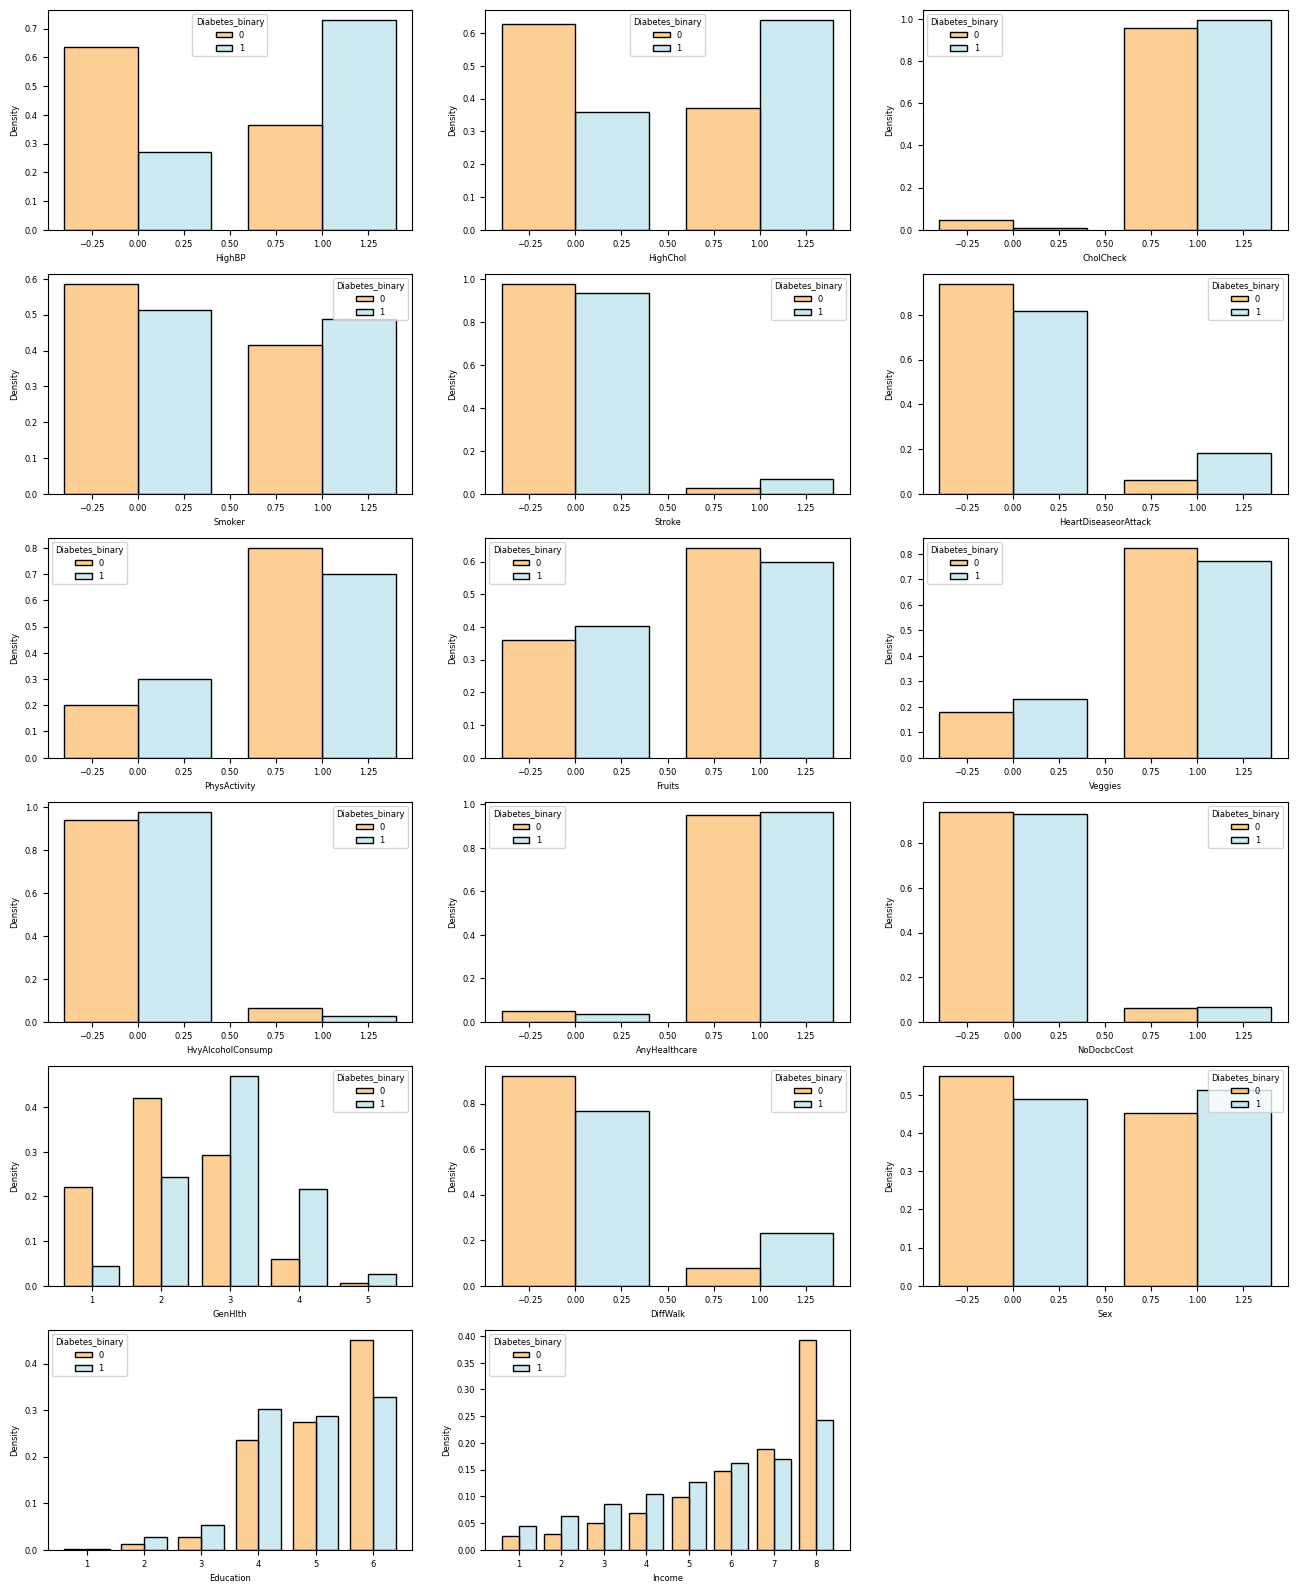

In [203]:
## Plot grouped bar charts for categorical variables
cat_list = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
            'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']

fig = plt.figure(figsize = (16, 20))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(6, 3, i + 1)

  # dxp.count(column, data= diabetes, split='Diabetes_binary', normalize=column)
  chart = sns.histplot(data = diabetes, x = column, shrink = 0.8, multiple='dodge', hue = 'Diabetes_binary', stat = 'density', common_norm = False, palette = 'RdYlBu')

Multiple initial observations can be drawn from the grouped bar charts.
+ High blood pressure (HighBP): Compared to high blood pressure respondents, fewer are diagnosed with diabetes among respondents who do not have high blood pressure. Similar relationships exist in High cholesterol (HighChol), Cholesterol check (CholCheck), Smoker, Stroke, Heart disease attack (HeartDiseaseAttack), Have difficulty in walking (DiffWalk). Except that difference is mild across groups of Cholesterol check (CholCheck) and Stroke.
+ Physical activity (PhysActivity): Compared to respondents who do not have physical activity in past 30 days, those who have physical activities have fewer people diagnosed with Diabetes.
+ Fruits: Compare to those who do not consume fruits 1 or more times per day, those who do have fewer people diagnosed with Diabetes, but the difference is mild. Similarly, respondents across groups of whether consuming vegetables (veggies), whether consuming alchohol heavily (HvyAlcoholConsumer), have any kind of healthcare (AnyHealthCare), no doctor visit because of cost (NoDocbcCost) seem to very little difference in terms of diabetes.
+ Self-reported general health (GenHlth): Compared to those who report poorer health conditions, those who report that they are healthy are diagnosed less with diabetes.
+ Income: Higher income group has lower proportion of diabete patients.

## 3. Modeling

### 3.1 Splitting dataset into training, validation, and testing dataset

Before the modeling part, we first split the dataset into training dataset (60%), validation dataset (20%), and testing dataset (20%)

In [157]:
X = diabetes.drop(['Diabetes_binary'], axis=1)
y = diabetes["Diabetes_binary"]

## first split the dataset into training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## second split the training dataset into training dataset and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [158]:
## double check the length of y_test 
len(y_test)

10013

### 3.2 Evaluation metrics

As evaluation metrics, we choose precision, recall, F1 score, and ROC-AUC

+ Precision measures the accuracy of positive predictions. Precision = True positive/(True Positives + False Positives)

+ Recall (Sensitivity) measures the completeness of positive predictions. It means how good a test is at detecting the positives. Recall = true positive/(True Positives + False Negatives)

+ Specificity. Specificity measures the proportion of true negatives that are correctly identified by the model. It means how good a test is at avoiding false alarms. Specificity = (True Negative)/(True Negative + False Positive)

+ F1 score comprehensively considers precision and recall. F1 score = 2*precision*recall/(precision + recall)

+ ROC & AUC: ROC is the plot of true positive rate against false positive rate at various classification threshold. AUC is the area under the ROC curve. The higher AUC indicates higher model performance.

In the medical field, we pay attention to [specifity and sensitity](https://uberpython.wordpress.com/2012/01/01/precision-recall-sensitivity-and-specificity/#:~:text=Specificity%20%E2%80%93%20how%20good%20a%20test,result%20it's%20most%20confident%20in.) in particular. The goal is to get as high and balanced as possible for both sensitivity and specificity. In the meantime maximize the AUC.

### 3.3 Machine learning models: Hyper parameter tuning and model evaluation

After tried a bunch of classification models (Support Vector Machine, K Nearest Neighbor, Decision tree, random forest, XGBoost, Logistic regression, Neural network, Naive Bayes), I decide to present the result of logistic regression, random forest, XGBoost, and Neural network since these are the most commonly used models in classification tasks.

In [159]:
pre_list_train = [] ## precision list
rec_list_train = [] ## recall (sensitivity) list
spe_list_train = train = [] ## specificity list
auc_list_train = [] ## AUC list
f1_list_train = [] ## F1 score

pre_list_val = [] ## precision list
rec_list_val = [] ## recall list
spe_list_val = train = [] ## specificity list
auc_list_val = [] ## AUC list
f1_list_val = [] ## F1 score

In [160]:
best_est = [] ## Best estimator from hyperparameter tunning

#### 3.3.1 Logistic Regression

Logistic regression is easy to implement, interpret, and efficient to train. It is very fast among classification models.

In [ ]:
# defining parameter range
param_grid = {'penalty' : ['l1','l2'], 
              'C' : np.logspace(4, 20),
              'solver'  : ['liblinear']}
            
LG_grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5, verbose = 3)

# fit the model
LG_grid.fit(X_train, y_train)

# print best parameter after tuning
print(LG_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(LG_grid.best_estimator_)

best_est.append(LG_grid.best_estimator_)

#### 3.3.2 Random forest

Random forest is an ensemble learning method for classification. It consists of many decision trees, yet it provides a higher level of accuracy in predicting outcomes over the decision tree algorithm. It's commonly used in classification tasks.

In [ ]:
# defining parameter range
param_grid = {'max_depth': [16, 32, 64, 128], 
              'min_samples_split': [2, 10],
              'n_estimators': [128, 256, 512],
              'max_leaf_nodes': [512, 1024]}
            
RF_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, verbose = 3)

# fit the model
RF_grid.fit(X_train, y_train)

# print best parameter after tuning
print(RF_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(RF_grid.best_estimator_)

In [166]:
best_est.append(RF_grid.best_estimator_)

#### 3.3.3 XGBoost

XGBoost is a scalable, distributed gradient-boost decision tree method. It's also widely used in classification problems.

In [ ]:
# defining parameter range
param_grid = {'n_estimators': [8, 16, 32],
              'max_depth': [2, 4, 16],
              'reg_lambda': [1, 2]}
            
XGB_grid = GridSearchCV(XGBClassifier(tree_method="gpu_hist", enable_categorical = True), param_grid, cv = 5, verbose = 3)

# fit the model
XGB_grid.fit(X_train, y_train)

# print best parameter after tuning
print(XGB_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(XGB_grid.best_estimator_)

best_est.append(XGB_grid.best_estimator_)


#### 3.3.4 Neural network

Artificial Neural Network(ANN) uses the processing of the brain to develop algorithms that can be used to tackle classification problems. It has the ability to learn and model non-linear and complex relationships. It also does not have restrictions on how input data should be distributed.

In [ ]:
# defining parameter range

param_grid = {'learning_rate': ['adaptive', 'constant'], 
              'hidden_layer_sizes': [(15,15,), (15, 15, 15, )],
              'batch_size': [500, 1000, 5000]}
            
NN_grid = GridSearchCV(MLPClassifier(), param_grid, cv = 5, verbose = 3)

# fit the model
NN_grid.fit(X_train, y_train)

# print best parameter after tuning
print(NN_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(NN_grid.best_estimator_)

best_est.append(NN_grid.best_estimator_)

In [176]:
## print best estimators
best_est

[LogisticRegression(C=44984.32668969444, penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_depth=128, max_leaf_nodes=512, min_samples_split=10,
                        n_estimators=512),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=True, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=32, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 MLPClassifier(batch_size=1000, hidden_la

### 3.4 Model evaluation

#### 3.4.1 Evaluation metric comparison

In [177]:
## run best estimators on training and validation dataset
## calculate evaluation metrics
for model in best_est:
  # predict y on the training and validation dataset
  y_pred_train = model.predict(X_train)

  pre_list_train.append(metrics.precision_score(y_train, y_pred_train))
  rec_list_train.append(metrics.recall_score(y_train, y_pred_train))
  auc_list_train.append(metrics.roc_auc_score(y_train, y_pred_train))
  f1_list_train.append(metrics.f1_score(y_train, y_pred_train))

  tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
  specificity = tn / (tn+fp)
  spe_list_train.append(specificity)

  y_pred_val = model.predict(X_val)

  # calculate the metrics
  pre_list_val.append(metrics.precision_score(y_val, y_pred_val))
  rec_list_val.append(metrics.recall_score(y_val, y_pred_val))
  auc_list_val.append(metrics.roc_auc_score(y_val, y_pred_val))
  f1_list_val.append(metrics.f1_score(y_val, y_pred_val))

  tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val).ravel()
  specificity = tn / (tn+fp)
  spe_list_val.append(specificity)

In [178]:
### Training dataset
model_list = ['Logistic regression', 'Random forest', 'XGBoost', 'Neural network']

result_train = pd.DataFrame({'Model': model_list, 
                       'Precision_train': pre_list_train, 'recall_train (sensitivity)': rec_list_train, 
                       'Specifity_train':spe_list_train,
                       'F1 score_train': f1_list_train, 'AUC_train': auc_list_train})
result_train

,Model,Precision_train,recall_train (sensitivity),Specifity_train,F1 score_train,AUC_train
0,Logistic regression,0.718974,0.724647,0.758769,0.721800,0.741708
1,Random forest,0.752282,0.793558,0.777449,0.772369,0.785503
2,XGBoost,0.715877,0.749041,0.746810,0.732083,0.747925
3,Neural network,0.717047,0.743829,0.750015,0.730193,0.746922


In [179]:
### Validation dataset
result_val = pd.DataFrame({'Model': model_list, 
                       'Precision_val': pre_list_val, 'recall_val (sensitivity)': rec_list_val, 
                       'Specifity_val':spe_list_val,
                       'F1 score_val': f1_list_val, 'AUC_val': auc_list_val})
result_val

,Model,Precision_val,recall_val (sensitivity),Specifity_val,F1 score_val,AUC_val
0,Logistic regression,0.705779,0.707173,0.753575,0.706475,0.730374
1,Random forest,0.696945,0.735468,0.732673,0.715688,0.734071
2,XGBoost,0.700189,0.731520,0.738174,0.715512,0.734847
3,Neural network,0.704377,0.730643,0.743674,0.717270,0.737159


#### 3.4.2 Pick the best model

Based on model performance on the validation set, all four models perform pretty similarly. Random forest has a slightly more balanced sensitivity and specitivity rate, and relatively large AUC. Therefore we pick Random forest as the best model in this analysis.

The evaluation metrics on the testing dataset is as follows:
+ precision: 0.706
+ recall (sensitivity): 0.735
+ specificity: 0.742
+ f1 score: 0.721
+ AUC: 0.739

In [181]:
best_est[1]

RandomForestClassifier(max_depth=128, max_leaf_nodes=512, min_samples_split=10,
                       n_estimators=512)

In [180]:
## run the model on testing dataset
y_pred = best_est[1].predict(X_test)

In [182]:
## calculate metrics on testing dataset
pre_test = metrics.precision_score(y_test, y_pred)
rec_test = metrics.recall_score(y_test, y_pred)
f1_test = metrics.f1_score(y_test, y_pred)
auc_test = metrics.roc_auc_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spe_test = tn / (tn+fp)

In [183]:
## print precision, recall, f1 score, and auc for the testing dataset
[pre_test, rec_test, spe_test, f1_test, auc_test]

[0.7062644039388225,
 0.7353839441535777,
 0.7417572296923927,
 0.72053008442877,
 0.7385705869229852]

## 4. Result interpretation

### 4.1 Identify top predictors

Here, to identify top predictors, we print out feature importance calculated by the random forest.

Similarly, we can also explain the model by 
+ Take out each column and rerun the model. Observe the metric change before and after taking out the variable, and 
+ Shuffle the values in each column and rerun the model. Observe the metric change before and after taking out the variable.
+ Use Shap package

Text(0.5, 0, 'Random Forest Feature Importance')

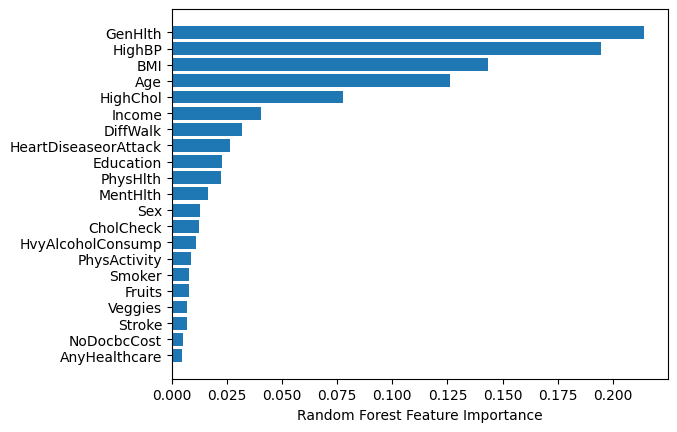

In [185]:
## print feature importance
best_est[1].feature_importances_

sorted_idx = best_est[1].feature_importances_.argsort()
plt.barh(diabetes.columns[1:][sorted_idx], best_est[1].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### 4.2 Variable interpretation

Among all variables, self-reported health condition (GenHlth: 1 = excellent while 5 = poor) is the most important among all variables. This is consistent with what we found in the exploratory data analysis section: respondents who perceive themselves to be healthier are less likely to be diagnosed with diabetes.

High blood pressure (HighBP: 0 = no high blood pressure while 1 = high blood pressure) is also an important predictor of diabetes. Respondents with high blood pressure have higher risk of having diabetes.

The following important predictors are BMI, high cholesterol (0 = no high cholesterol while 1 = high cholesterol), and age. The result is consistent with current studies. According to [a report by Centers for discrease control and prevention](https://www.cdc.gov/diabetes/basics/risk-factors.html), people who are overweight or age 45 and older are closely associated with being diagnosed with Type II diabetes.

Suprisingly, physical activity (PhysActivity: 0 = no physical activity in pass 30 days while 1 = there are physical activities in pass 30 days) are relatively unimportant. In [the same report](https://www.cdc.gov/diabetes/basics/risk-factors.html), people who are physically active less than 3 times a week are more likely to have diabetes. This might be due to the different measures in data collection.


## 5. Limitations

This analysis could be refined in several ways:

So far, this analysis only treats the response variable as a binary one: have diabetes or not, while diabetes includ respondents diagnosed with diabetes or prediabetes. In the future, predicting respondents with no diabetes, prediabetes, and diabetes separetly might provide more specific insights.

Including other important variables could potentially improve the model performance. According to [a peer-reviewed study](https://www.sciencedirect.com/science/article/pii/S240584402101522X), most significant predictors for diabetes also include family history, race, waist-hip ratio, and so on. 

A detailed feature engineering job could also improve the model performance. I played around with different variables and transformations. However the model performance could be improved more.

A more thorough hyperparameter tuning might also help promote the model performance. The hyperparameter tunning process is time consuming.

*A word about Google Colab: I use Google Colab because I thought it would be easier to coedit when presenting it. But it is definitely not suitable for running time consuming code like hyperparameter tunning!* 